In [39]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit import *
from qiskit.tools.monitor import job_monitor

import qiskit.quantum_info as qi

In [40]:
Aer.backends()
simulator = Aer.get_backend('aer_simulator')


In [44]:
# Set initial state to generated statevector
circ = QuantumCircuit(4, 3)
circ.x(3)
circ.barrier()
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
circ.cx(0,3)
circ.cx(2,3)
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier()
circ.measure([0,1,2], [0,1,2])
circ.draw()

░ ┌───┐     ┌───┐      ░ ┌─┐      
q_0: ──────░─┤ H ├──■──┤ H ├──────░─┤M├──────
           ░ ├───┤  │  ├───┤      ░ └╥┘┌─┐   
q_1: ──────░─┤ H ├──┼──┤ H ├──────░──╫─┤M├───
           ░ ├───┤  │  └───┘┌───┐ ░  ║ └╥┘┌─┐
q_2: ──────░─┤ H ├──┼────■──┤ H ├─░──╫──╫─┤M├
     ┌───┐ ░ ├───┤┌─┴─┐┌─┴─┐└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├─░─┤ H ├┤ X ├┤ X ├──────░──╫──╫──╫─
     └───┘ ░ └───┘└───┘└───┘      ░  ║  ║  ║ 
c: 3/════════════════════════════════╩══╩══╩═
                                     0  1  2

In [46]:
# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'101': 1000}


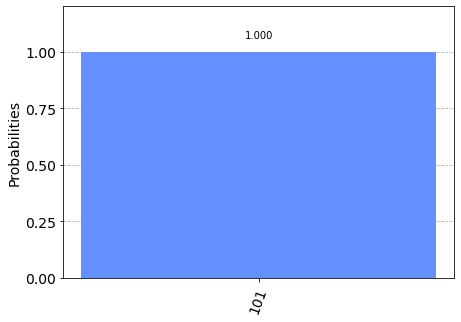

In [47]:
plot_histogram(counts)